## Problem 2

### 2.3

In [89]:
import math

p1 = 0.1
p2 = 0.8

#KL (P,Q)
kl_p_q = p1 * math.log(p1/p2) + (1-p1) * math.log((1-p1)/(1-p2))
txt = "KL(P,Q) = {:0.2f}".format(kl_p_q)
print(txt)

#KL(Q,P)
kl_p_q = p2 * math.log(p2/p1) + (1-p2) * math.log((1-p2)/(1-p1))
txt = "KL(Q,P) = {:0.2f}".format(kl_p_q)
print(txt)

KL(P,Q) = 1.15
KL(Q,P) = 1.36


## Problem #3: Classifiers and Metrics - Coding
### Support Code for Problem 3 (used throughout problem 3)

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# storing the data in a numpy array with column labels as follows:
# ["Age","likeRowing","Experience","Income","Y"]


data = np.array([
    [20,1,0,20,0,0],
    [18,1,1,33,0,0],
    [11,0,1,21,1,0],
    [31,0,0,18,1,0],
    [19,1,1,7,1,0],
    [21,1,0,10,0,0],
    [44,1,0,23,1,0],
    [15,1,1,16,0,0],
    [16,0,1,15,1,0],
    [17,1,0,6,0,0]
],dtype=np.double)



def g_x(x = np.empty((4,1),dtype=np.double)):
    #define theta and theta_0
    theta = np.array([0.05,-3,2.1,0.008],dtype=np.double)
    theta_0 = np.double(0.3)

    #return g(x)
    return np.matmul(np.transpose(theta),x) + theta_0

def f_x(x = np.empty((4,1),dtype = np.double)):
    return np.tanh(g_x(x))

def compute_confusion_matrix(f_x,y,threshold = np.double(0.0)):
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(0,f_x.size):
        if y[i] == 1:
            if f_x[i] >= threshold:
                TP += 1
            else:
                FN += 1
        else: #Y = 0
            if f_x[i] < threshold:
                TN += 1
            else:
                FP += 1
    
    return np.array([[TP,FP],[FN,TN]])

def print_confusion_matrix(cm):
    df = pd.DataFrame({"y = +1":cm[:,0],"y = 0":cm[:,1]},
        index = ["f(x) >= threshold","f(x) < threshold"])
    print(df)

def compute_missclassification_error(cm):

    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[0,0]
    TN = cm[1,1]

    return (FP + FN)/(FP + FN + TP + TN)

def compute_true_positive_rate(cm):

    TP = cm[0,0]
    FN = cm[1,0]

    return (TP) / (TP + FN)

def compute_true_negative_rate(cm):

    TN = cm[1,1]
    FP = cm[0,1]

    return (TN) / (TN + FP)

def compute_false_positive_rate(cm):

    FP = cm[0,1]
    TN = cm[1,1]

    return (FP) / (TN + FP)

def compute_precision(cm):

    TP = cm[0,0]
    FP = cm[0,1]

    return (TP) / (TP + FP)

def compute_F1(cm):
    
    precision = compute_precision(cm)
    recall = compute_true_positive_rate(cm)

    return 2 * (precision * recall)/(precision + recall)

def print_summary_statistics(f_x,y,threshold = 0):

    #compute the confusion matrix:
    cm = compute_confusion_matrix(f_x,y,threshold)

    #Print confusion matrix
    txt = "Confusion Matrix:"
    print(txt)
    print_confusion_matrix(cm)
    
    #Print missclassification error
    txt = "\nMissclassification Error: {}\n".format(compute_missclassification_error(cm))
    print(txt)

    #Print Recall (TPR)
    txt = "Recall (TPR): {}\n".format(compute_true_positive_rate(cm))
    print(txt)

    #print Specificity (TNR)
    txt = "Specificity: {}\n".format(compute_true_negative_rate(cm))
    print(txt)

    #Print False Positive Rate
    txt = "False Positive Rate: {}\n".format(compute_false_positive_rate(cm))
    print(txt)

    #print Precision
    txt = "Precision: {}\n".format(compute_precision(cm))
    print(txt)

    #print F1
    txt = "F1: {}\n".format(compute_F1(cm))
    print(txt)

def generate_ROC_curve(f_x,y,show_plt = True):
    
    #put f_x and f_y into an array
    data = np.array([y,f_x]).transpose()

    #sort the array
    data = data[(-1 * data[:,1]).argsort()]

    #initialize an array of (FPR,TPR) coordinates for each threshold
    ROC_points = np.empty((data.shape[0] + 2,2))

    #initialize the first point
    ROC_points[0,:] = [0,0]

    #initialize the last point
    ROC_points[11,:] = [1,1]

    #for each threshold value
    for i in range(0,data.shape[0]):

        #compute the confusion matrix at the threshold
        cm = compute_confusion_matrix(f_x,y,data[i,1])

        #compute the FPR and TPR
        TPR = compute_true_positive_rate(cm)
        FPR = compute_false_positive_rate(cm)

        #save the values in the array
        ROC_points[i + 1,:] = [FPR,TPR]
    
    #plot the ROC curve
    if show_plt:
        plt.plot(ROC_points[:,0],ROC_points[:,1])
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve")
        plt.show()
    return ROC_points

def plot_misclassification_vs_threshold(f_x,y,step_size = 0.1,show_plt = True):
        #put f_x and f_y into an array
    data = np.array([y,f_x]).transpose()

    #sort the array
    data = data[(-1 * data[:,1]).argsort()]

    max_threshold = data[0,1] + 1
    min_threshold = data[-1,1] - 1

    #initialize an array to hold the plot points
    thresholds_to_test = np.arange(min_threshold,max_threshold,step_size)

    plt_points = np.empty((thresholds_to_test.shape[0],2))

    #for each threshold value
    for i in range(0,thresholds_to_test.shape[0]):

        #compute the confusion matrix at the threshold
        threshold = thresholds_to_test[i]
        cm = compute_confusion_matrix(f_x,y,threshold)

        #compute the FPR and TPR
        miss_class_error = compute_missclassification_error(cm)

        #save the values in the array
        plt_points[i,:] = [threshold,miss_class_error]
    
    #plot the ROC curve
    if show_plt:
        plt.plot(plt_points[:,0],plt_points[:,1])
        plt.xlabel("Threshold")
        plt.ylabel("Miss Classification Error")
        plt.title("Threshold vs Miss Classification Error")
        plt.show()
    return plt_points

def compute_g_x(data,print_output = True):
    #compute g(x) for each x
    for i in range(0,data.shape[0]):
        data[i,5] = g_x(data[i,0:4])

    if print_output:
        df = pd.DataFrame({"Age":data[:,0],
                            "likeRowing":data[:,1],
                            "Experience":data[:,2],
                            "Income":data[:,3],
                            "Y":data[:,4],
                            "g(x)":data[:,5]})
        print(df)
    return data

def compute_f_x(data,print_output = True):
    #compute g(x) for each x
    for i in range(0,data.shape[0]):
        data[i,5] = f_x(data[i,0:4])

    if print_output:
        df = pd.DataFrame({"Age":data[:,0],
                            "likeRowing":data[:,1],
                            "Experience":data[:,2],
                            "Income":data[:,3],
                            "Y":data[:,4],
                            "f(x)":data[:,5]})
        print(df)
    return data

def sort_output(data,f_x_col_idx,f_x_label = "f(x)",print_output = True):
    #print a list sorted by the value of f_x
    sorted_data = data[(-1 *data[:,f_x_col_idx]).argsort()]

    if print_output:
        df = pd.DataFrame({"Age":sorted_data[:,0],
                            "likeRowing":sorted_data[:,1],
                            "Experience":sorted_data[:,2],
                            "Income":sorted_data[:,3],
                            "Y":sorted_data[:,4],
                            f_x_label:sorted_data[:,5]})
        
        print(df)


### Problem 3.1

Calculated Values of g(x)

In [91]:
g_x_computed = compute_g_x(data,True)

    Age  likeRowing  Experience  Income    Y   g(x)
0  20.0         1.0         0.0    20.0  0.0 -1.540
1  18.0         1.0         1.0    33.0  0.0  0.564
2  11.0         0.0         1.0    21.0  1.0  3.118
3  31.0         0.0         0.0    18.0  1.0  1.994
4  19.0         1.0         1.0     7.0  1.0  0.406
5  21.0         1.0         0.0    10.0  0.0 -1.570
6  44.0         1.0         0.0    23.0  1.0 -0.316
7  15.0         1.0         1.0    16.0  0.0  0.278
8  16.0         0.0         1.0    15.0  1.0  3.320
9  17.0         1.0         0.0     6.0  0.0 -1.802


Next, we determine what choise of threshold would minimize misclassification error. To do this, we can generate a plot of threshold vs miss-classification error

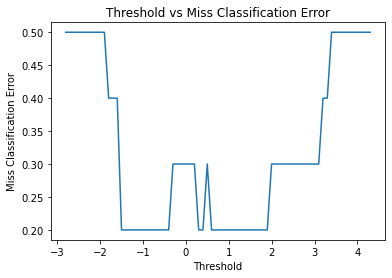

    Age  likeRowing  Experience  Income    Y   g(x)
0  16.0         0.0         1.0    15.0  1.0  3.320
1  11.0         0.0         1.0    21.0  1.0  3.118
2  31.0         0.0         0.0    18.0  1.0  1.994
3  18.0         1.0         1.0    33.0  0.0  0.564
4  19.0         1.0         1.0     7.0  1.0  0.406
5  15.0         1.0         1.0    16.0  0.0  0.278
6  44.0         1.0         0.0    23.0  1.0 -0.316
7  20.0         1.0         0.0    20.0  0.0 -1.540
8  21.0         1.0         0.0    10.0  0.0 -1.570
9  17.0         1.0         0.0     6.0  0.0 -1.802


In [92]:
plt_points = plot_misclassification_vs_threshold(g_x_computed[:,5],g_x_computed[:,4],0.1)

#print out a sorted list of g(x) as well
sort_output(g_x_computed,5,"g(x)",True)

Based on this plot, it is clear that we can minimize misclassification error by putting the threshold in the following intervals: (-1.540,-.316),(0.278,0.406), and (0.564,1.994). Setting the threshold in any of these intervals gives us a missclassification error of 0.2

### Problem 3.2

Start by calculating the values of f(x)

In [93]:
f_x_computed = compute_f_x(data,print_output = True)

    Age  likeRowing  Experience  Income    Y      f(x)
0  20.0         1.0         0.0    20.0  0.0 -0.912120
1  18.0         1.0         1.0    33.0  0.0  0.510939
2  11.0         0.0         1.0    21.0  1.0  0.996092
3  31.0         0.0         0.0    18.0  1.0  0.963601
4  19.0         1.0         1.0     7.0  1.0  0.385071
5  21.0         1.0         0.0    10.0  0.0 -0.917026
6  44.0         1.0         0.0    23.0  1.0 -0.305886
7  15.0         1.0         1.0    16.0  0.0  0.271053
8  16.0         0.0         1.0    15.0  1.0  0.997389
9  17.0         1.0         0.0     6.0  0.0 -0.947013


Next, we determine what choise of threshold would minimize misclassification error. To do this, we can generate a plot of threshold vs miss-classification error

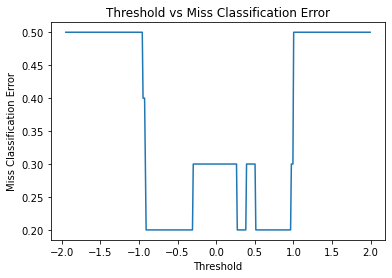

    Age  likeRowing  Experience  Income    Y      f(x)
0  16.0         0.0         1.0    15.0  1.0  0.997389
1  11.0         0.0         1.0    21.0  1.0  0.996092
2  31.0         0.0         0.0    18.0  1.0  0.963601
3  18.0         1.0         1.0    33.0  0.0  0.510939
4  19.0         1.0         1.0     7.0  1.0  0.385071
5  15.0         1.0         1.0    16.0  0.0  0.271053
6  44.0         1.0         0.0    23.0  1.0 -0.305886
7  20.0         1.0         0.0    20.0  0.0 -0.912120
8  21.0         1.0         0.0    10.0  0.0 -0.917026
9  17.0         1.0         0.0     6.0  0.0 -0.947013


In [94]:
plt_points = plot_misclassification_vs_threshold(f_x_computed[:,5],f_x_computed[:,4],0.01)

#print out a sorted list of g(x) as well
sort_output(f_x_computed,5,"f(x)",True)

Based on this plot, it is clear that we can minimize misclassification error by putting the threshold in the following intervals: (-0.912,-0.305),(0.271,0.385), and (0.51,0.96). Setting the threshold in any of these intervals gives us a missclassification error of 0.2. 

Next, we compute the confusion matrix, precision, recall, and F1 score for the threshold from (0.51,0.96) using a threshold of 0.6

In [95]:
#compute relevant statistics for threshold of 0.6
print_summary_statistics(f_x_computed[:,5],f_x_computed[:,4],threshold= 0.6)

Confusion Matrix:
                   y = +1  y = 0
f(x) >= threshold       3      0
f(x) < threshold        2      5

Missclassification Error: 0.2

Recall (TPR): 0.6

Specificity: 1.0

False Positive Rate: 0.0

Precision: 1.0

F1: 0.7499999999999999



### Problem 3.3

Plot the ROC curves with additional points for decision points with minimum classification error

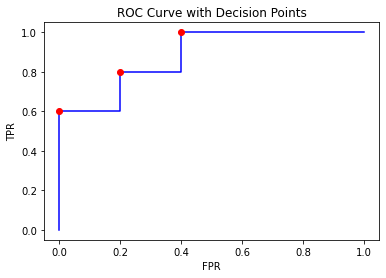

In [100]:
ROC_points = generate_ROC_curve(f_x_computed[:,5],f_x_computed[:,4],show_plt= False)

decision_points = np.array([[0,0.6],[0.2,0.8],[0.4,1.0]])
plt.plot(ROC_points[:,0],ROC_points[:,1],"b-",decision_points[:,0],decision_points[:,1],"ro")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve with Decision Points")
plt.show()

## Problem 4 Support

## Problem 5

### Problem 5.1

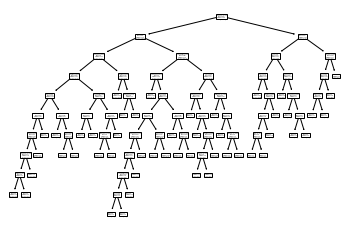

In [111]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

def import_and_format_data(csv,print_preview = True):
    data = pd.read_csv(csv)

    #convert ShelveLoc to be numerical
    d = {"Bad":0,"Medium":1,"Good":2}
    data["ShelveLoc"] = data["ShelveLoc"].map(d)

    #convert urban and US to numerical
    d = {"Yes":0,"No":1}
    data["Urban"] = data["Urban"].map(d)
    data["US"] = data["US"].map(d)

    if print_preview:
        print(data)
    return data

def train_with_sklearn(X,Y,features,plot_tree = True):
    dtree = DecisionTreeClassifier()
    dtree = dtree.fit(X,Y)

    if plot_tree:
        tree.plot_tree(dtree,feature_names= features)

    return dtree

data = import_and_format_data("carseats_train.csv",print_preview= False)

features = ["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]
X = data[features]
Y = data["Sales"]

dtreee = train_with_sklearn(X,Y,features)
